In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "gulim")
plt.rc("axes", unicode_minus = False)

In [15]:
iris_df = sns.load_dataset("iris")
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, :-1]
print(X.shape)
print(y.shape)

(150, 4)
(150, 4)


In [32]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size = 0.2
)

In [33]:
ss = StandardScaler()
ss.fit(train_X)
train_scaled = ss.transform(train_X)
test_scaled = ss.transform(test_X)

In [34]:
knn = KNeighborsRegressor()

knn.fit(train_scaled, train_y)
print("Train ACC = {:.4f}".format(knn.score(train_scaled, train_y)))
print("Train ACC = {:.4f}".format(knn.score(test_scaled, test_y)))

Train ACC = 0.9748
Train ACC = 0.9622


In [35]:
print(knn.classes_)
print(knn.feature_names_in_)
print(knn.effective_metric_)
print(knn.n_samples_fit_)
print(knn.n_neighbor)

AttributeError: 'KNeighborsRegressor' object has no attribute 'classes_'

In [36]:
wine = pd.read_csv("https://bit.ly/wine-date")
print(wine.head())
print(wine.info())

   alcohol  sugar    pH  class
0      9.4    1.9  3.51    0.0
1      9.8    2.6  3.20    0.0
2      9.8    2.3  3.26    0.0
3      9.8    1.9  3.16    0.0
4      9.4    1.9  3.51    0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB
None


In [39]:
wine["class"] = wine["class"].astype("int32").astype("category")
wine.head()
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   alcohol  6497 non-null   float64 
 1   sugar    6497 non-null   float64 
 2   pH       6497 non-null   float64 
 3   class    6497 non-null   category
dtypes: category(1), float64(3)
memory usage: 158.8 KB


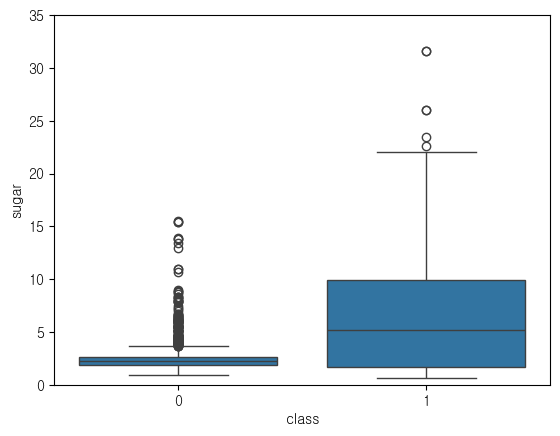

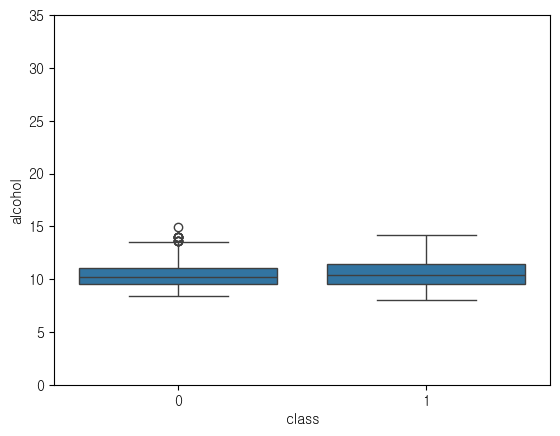

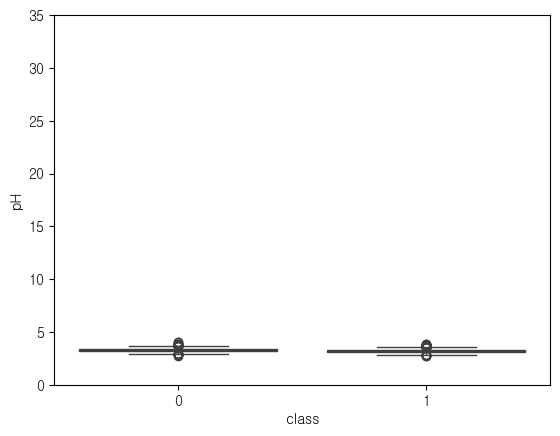

In [45]:
sns.boxplot(wine, x = "class", y = "sugar")
plt.ylim(0, 35)
plt.show()

sns.boxplot(wine, x = "class", y = "alcohol")
plt.ylim(0, 35)
plt.show()

sns.boxplot(wine, x = "class", y = "pH")
plt.ylim(0, 35)
plt.show()

In [50]:
X = wine.iloc[:, :-1]
y = wine.iloc[:, -1]
print(X.shape)
print(y.shape)


(6497, 3)
(6497,)


In [51]:
##Split(나누기)
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size = 0.2
)
print(train_X.shape)
print(test_X.shape)

(5197, 3)
(1300, 3)


In [56]:
standardScaler = StandardScaler()
standardScaler.fit(train_X)

print(standardScaler.mean_)
print(standardScaler.scale_)

train_scaled = standardScaler.transform(train_X)
test_scaled = standardScaler.transform(test_X)

[10.48794625  5.4460458   3.21800847]
[1.19868319 4.76949684 0.15957099]


In [57]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=5, max_leaf_nodes = 10)
dt.fit(train_scaled, train_y)

print("train acc = ", dt.score(train_scaled, train_y))
print("test acc = ", dt.score(test_scaled, test_y))

train acc =  0.8654993265345392
test acc =  0.8607692307692307


In [86]:

from sklearn.tree import plot_tree


<function matplotlib.pyplot.show(close=None, block=None)>

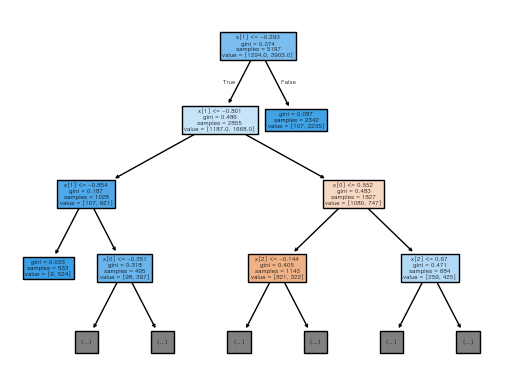

In [93]:
plot_tree(dt, max_depth = 3, filled=True)
plt.show

In [92]:
print(dt.feature_importances_)
pd.DataFrame(dt.feature_importances_, index = train_X.columns)

[0.14312504 0.76322764 0.09364733]


,0
alcohol,0.143125
sugar,0.763228
pH,0.093647


In [116]:
##교차검증(cross validation, cv)
from sklearn.model_selection import cross_validate, StratifiedKFold, GridSearchCV


In [110]:
cv_X_scaled = ss.fit_transform(X)

In [111]:
print(y.value_counts())

class
1    4898
0    1599
Name: count, dtype: int64


In [114]:
splitter = StratifiedKFold(n_splits = 5, shuffle=True)
cv_result = cross_validate(dt, cv_X_scaled, y, cv = splitter)


In [115]:
print(cv_result["test_score"].mean())

0.857779830638953


In [129]:
##GridSearch
dt = DecisionTreeClassifier()
params = {
    "min_impurity_decrease":np.arange(0.001, 0.01, 0.0001),
    "min_samples_split":np.arange(2, 100, 10),
    "max_depth": np.arange(5, 30, 1)
}
grid_cv = GridSearchCV(dt, 
                       param_grid=params,
                       cv = splitter)
grid_cv.fit(cv_X_scaled, y)
# print(grid_cv.cv_results_)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                         'min_impurity_decrease': array([0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015, 0.0016, 0.0017,
       0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023, 0.0024, 0.0...
       0.0058, 0.0059, 0.006 , 0.0061, 0.0062, 0.0063, 0.0064, 0.0065,
       0.0066, 0.0067, 0.0068, 0.0069, 0.007 , 0.0071, 0.0072, 0.0073,
       0.0074, 0.0075, 0.0076, 0.0077, 0.0078, 0.0079, 0.008 , 0.0081,
       0.0082, 0.0083, 0.0084, 0.0085, 0.0086, 0.0087, 0.0088, 0.0089,
       0.009 , 0.0091, 0.0092, 0.0093, 0.0094, 0.0095, 0.0096, 0.0097,
       0.0098, 0.0099]),
                         'min_samples_split': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])})

In [130]:
grid_cv.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_impurity_decrease', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [131]:
print(grid_cv.best_params_)
print(np.mean(grid_cv.cv_results_["mean_test_score"]))

{'max_depth': np.int64(8), 'min_impurity_decrease': np.float64(0.001), 'min_samples_split': np.int64(2)}
0.8543706765625102


In [26]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler


In [27]:
rf = RandomForestClassifier(n_estimators=100)

In [30]:
ss = StandardScaler()
cv_X_scaled = ss.fit_transform(X)
y
print(cv_X_scaled.shape)
print(y.shape)

NameError: name 'cv_X_scaled' is not defined

In [23]:
gb = GradientBoostingClassifier()
params = {
    "n_estimators" : [50, 80, 100, 120],
    "max_depth" : [3, 5, 7, 9, 12, 15]
}

splitter = StratifiedKFold(n_splits = 5, shuffle = True)
grid_gb = GridSearchCV(rf, param_grid = params , cv = splitter)
grid_gb.fit(cv_X_scaled, y)

NameError: name 'cv_X_scaled' is not defined

In [24]:
print(grid_gb.best_params_)
print(grid_gb.cv_results_["mean_test_score"])
print(grid_gb.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'